![title](./Figures/header_web.png)

# Basics of Radio Astronomy: Reduction of ON OFF Cal_ON Cal_Off Observations

In [1]:
#modules: (type Shift+Enter to execute the cell)
from ea_modules_for_demo import *
%matplotlib inline 

## Background: (Shift+Enter the following cells to show content)

#### Arecibo Observatory, Puerto Rico (NAIC, UCF, NSF)
![title](./Figures/Arecibo.jpg) 

## Observations Conducted with the Arecibo Telescope Reveal Evidence of a Large Scale Filament Traced by CH (talk by Natalie Kovacevic, WIU undergraduate student). Click on the image to watch the 10min presentation.

[![Natalie's Talk](./Figures/Natalie_Talk_YouTube.png)](https://youtu.be/NYo77cUGg2k?t=2097)


### The previous talk was given at the International Online Meeting: A Multiscale Approach to Understanding Outflows During High-Mass Star Formation, August 2020. See Press Release:

In [2]:
display(IFrame('http://www.wiu.edu/news/newsrelease.php?release_id=17318', '100%', '600px'))

## The following documents include the telescope proposal, notes on observed spectral windows (boards), and log of the observations, which include a table of calibration diode temperatures. 

In [3]:
PDF('./Documents/Arecibo_SJ-CH_in_EGOs_cover_submitted_Araya190307124037.pdf',size=(900,450))

In [4]:
# Spectral Windows, Observations Details
PDF('./Documents/NOTES.pdf', size=(900,450))

In [5]:
#Execute this Cell (Shift+Enter): Set T_Cal Values (see file above)
Tcal_X = 10.80#K
Tcal_Y = 11.15#K

#### The following documents show the results of the pointing observations. 

In [6]:
#Pointing Scans
PDF('./Documents/spider_58741_925800685.pdf', size=(900,450))

In [7]:
#Pointing Scans
PDF('./Documents/spider_58742_925879164.pdf', size=(900,450))

In [8]:
#Execute this cell (shift+Enter): Set Telescope Gain:
gain = 6.6 #K/Jy

## Data Files (2 sources, 8 boards - Spectral Windows)

In [9]:
# ASCII FILES, ON SOURCE, board 7
!ls ./ASCII_DAT/*_b7_ON.dat

./ASCII_DAT/G35.79-0.17_925800188_b7_ON.dat
./ASCII_DAT/G35.83-0.20_925800192_b7_ON.dat


In [10]:
# ASCII FILES, OFF SOURCE, board 7
!ls ./ASCII_DAT/*_b7_OFF.dat

./ASCII_DAT/G35.79-0.17_925800188_b7_OFF.dat
./ASCII_DAT/G35.83-0.20_925800192_b7_OFF.dat


In [11]:
# ASCII FILES, OFF SOURCE, Cal ON, board 7
!ls ./ASCII_DAT/*_b7_CAL_ON.dat

./ASCII_DAT/G35.79-0.17_925800188_b7_CAL_ON.dat
./ASCII_DAT/G35.83-0.20_925800192_b7_CAL_ON.dat


In [12]:
# ASCII FILES, OFF SOURCE, Cal OFF, board 7
!ls ./ASCII_DAT/*_b7_CAL_OFF.dat

./ASCII_DAT/G35.79-0.17_925800188_b7_CAL_OFF.dat
./ASCII_DAT/G35.83-0.20_925800192_b7_CAL_OFF.dat


## Load and Plot Data

In [13]:
#Set Source_scan and board (spectral window).
source_scan = './ASCII_DAT/G35.79-0.17_925800188_'
board = 'b7'

#Create variables with file names
ON_file = source_scan+board+'_ON.dat'
OFF_file = source_scan+board+'_OFF.dat'
CAL_ON_file = source_scan+board+'_CAL_ON.dat'
CAL_OFF_file = source_scan+board+'_CAL_OFF.dat'

In [14]:
#Example of ASCII file: First 5 lines of ON_source file. 
# index       vel (km/s)    x-pol        y-pol           freq(MHz)
os.system('head -5 '+ON_file+' > buffer')
!more buffer


       1       190.55032     0.265957     0.258614       3333.9185
       2       190.41300     0.254779     0.248401       3333.9200
       3       190.27567     0.255340     0.248274       3333.9216
       4       190.13835     0.255416     0.248202       3333.9231
       5       190.00103     0.256886     0.249156       3333.9246


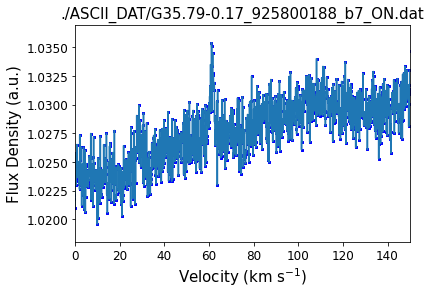

In [15]:
#load ascii file, plot
on_polX_spec = loadascii(inputfile=ON_file,column_x=2,column_y=3,skiprows=0)

plspec(spec=on_polX_spec,
       xmin=0,xmax=150,
       ymin=None,ymax=None,
       ylabel='Flux Density (a.u.)',
       xlabel='Velocity (km s$^{-1}$)', 
       title=ON_file)


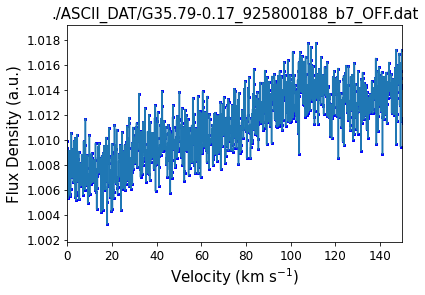

In [16]:
#load ascii file, plot
off_polX_spec = loadascii(inputfile=OFF_file,column_x=2,column_y=3,skiprows=0)

plspec(spec=off_polX_spec,
       xmin=0,xmax=150,
       ymin=None,ymax=None,
       ylabel='Flux Density (a.u.)',
       xlabel='Velocity (km s$^{-1}$)', 
       title=OFF_file)


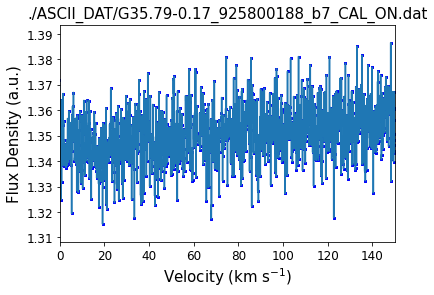

In [17]:
#load ascii file, plot
cal_on_polX_spec = loadascii(inputfile=CAL_ON_file,column_x=2,column_y=3,skiprows=0)

plspec(spec=cal_on_polX_spec,
       xmin=0,xmax=150,
       ymin=None,ymax=None,
       ylabel='Flux Density (a.u.)',
       xlabel='Velocity (km s$^{-1}$)', 
       title=CAL_ON_file)


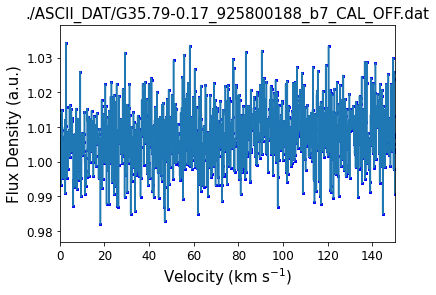

In [18]:
#load ascii file, plot
cal_off_polX_spec = loadascii(inputfile=CAL_OFF_file,column_x=2,column_y=3,skiprows=0)

plspec(spec=cal_off_polX_spec,
       xmin=0,xmax=150,
       ymin=None,ymax=None,
       ylabel='Flux Density (a.u.)',
       xlabel='Velocity (km s$^{-1}$)', 
       title=CAL_OFF_file)


## Get Tsys Spectrum

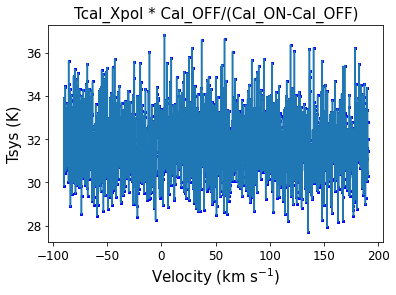

Tsys = 31.76 K


In [19]:
Tsys_spec = [cal_on_polX_spec[0],Tcal_X/((cal_on_polX_spec[1]-cal_off_polX_spec[1])/cal_off_polX_spec[1])]

plspec(spec=Tsys_spec,
       xmin=None,xmax=None,
       ymin=None,ymax=None,
       ylabel='Tsys (K)',
       xlabel='Velocity (km s$^{-1}$)', 
       title='Tcal_Xpol * Cal_OFF/(Cal_ON-Cal_OFF)')

Tsys = np.average(Tsys_spec[1])
print('Tsys = %1.2f K' % Tsys)


## Get Ta Spectrum

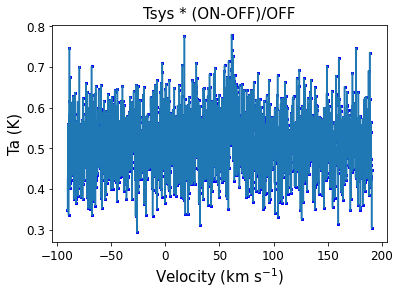

In [20]:
Ta_spec = [cal_on_polX_spec[0],Tsys*(on_polX_spec[1]-off_polX_spec[1])/off_polX_spec[1]]

plspec(spec=Ta_spec,
       xmin=None,xmax=None,
       ymin=None,ymax=None,
       ylabel='Ta (K)',
       xlabel='Velocity (km s$^{-1}$)', 
       title='Tsys * (ON-OFF)/OFF')



## Get $S_\nu$ Spectrum

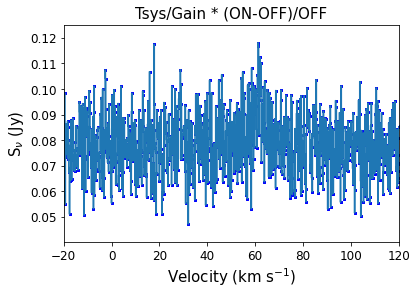

In [21]:
Snu_spec = [Ta_spec[0],Ta_spec[1]/gain]

plspec(spec=Snu_spec,
       xmin=-20,xmax=120,
       ymin=None,ymax=None,
       ylabel=r'S$_\nu$ (Jy)',
       xlabel='Velocity (km s$^{-1}$)', 
       title='Tsys/Gain * (ON-OFF)/OFF')



## Smooth Data

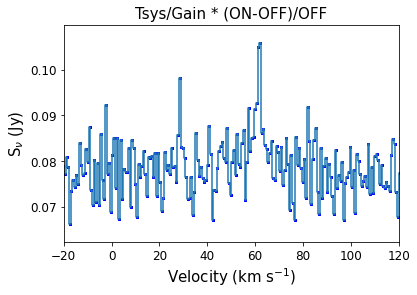

In [22]:
Snu_spec_smo = smooth_box(spec=Snu_spec, box_pts=5,decimate=True)

plspec(spec=Snu_spec_smo,
       xmin=-20,xmax=120,
       ymin=None,ymax=None,
       ylabel=r'S$_\nu$ (Jy)',
       xlabel='Velocity (km s$^{-1}$)', 
       title='Tsys/Gain * (ON-OFF)/OFF')



## Remove baseline


	 *******************************
	 Substract baseline


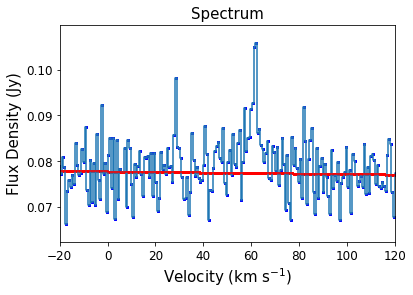

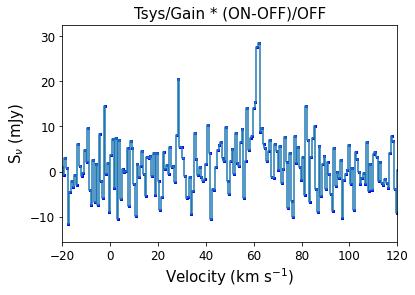

In [23]:
Snu_spec_smo_ba = Baseline(spec=Snu_spec_smo,
                           x1=-20,x2=20,
                           x3=80,x4=120,
                           poly_order=1,
                           title='Spectrum',
                           xmin=-20,xmax=120,
                           ymin=None,ymax=None,
                           xlabel=r'Velocity (km s$^{-1}$)',
                           ylabel='Flux Density (Jy)')

Snu_spec_smo_ba_mJy = [Snu_spec_smo_ba[0], 1.0e3*Snu_spec_smo_ba[1]]

plspec(spec=Snu_spec_smo_ba_mJy,
       xmin=-20,xmax=120,
       ymin=None,ymax=None,
       ylabel=r'S$_\nu$ (mJy)',
       xlabel='Velocity (km s$^{-1}$)', 
       title='Tsys/Gain * (ON-OFF)/OFF')



#### SUMMARY: Spectrum shown above is very similar to the one from Natalie's slide included above, although the peak flux density is slightly different. In this hands-on activity, only one polarization was used, a different smoothing algorithm was also used, and Natalie's reduction was done in IDL using the AOIDL library provided by the observatory, that has a better measurement of the telescope gain than the one used here.   

![title](./Figures/footer.png)